# __Basics of an RCT (A/B test)__:


## This notebook has 3 sections:
1. [Example of an RCT](#Example_RCT)
2. [Covid-19 RCT: Calculating Variance via Bootstrap (Q2)](#covid_rct)
3. [Work Program RCT: Conditional Average Treatment Effects (Q3)](#work_rct)


At the heart of any inference questions across industry or policy is if certain actions *cause* change across their population. Simple analysis over a sample might provide useful information on *predicting* or *finding significant changes* across groups but seldom provides a causal interpretation.

<a id='Example_RCT'></a>
## Example: loyalty Program

As an example imagine you're a researcher for a retail company. You're task with learning how their new loyalty card affects sales. As any good researcher you take in your data of customers: 
$$
Y_i = \alpha D_i + \beta + \epsilon_i
$$ 
where $Y_i$ is customer $i$'s spending amount in dollars, $D_i$ indicates if the customer is a loyalty card holder, and $\beta$ is the intercept term. If $D_i=1$, then individual $i$ has a loyalty card and we can say $Y(D=1) = Y(1) = \alpha+\beta+\epsilon_i$. If $D=0$, then individual $i$ has no loyalty card and we can say $Y(D=0) = Y(0) = \beta+\epsilon_i$


__With this model in mind you find $\hat{\alpha}$ = $\$25$ and is statisically significant.__ 
### What can this analysis tell us?:

1. loyalty card holders spend more than non card holders.
2. We could predict high spending customers by knowing if they have a loyalty card.


### What can this analysis *not* tell us?:
While the example above could provide helpful predictive insights, we __cannot__ say that this loyalty card is the reason why customers spend more in stores, why is this? To better understand lets turn to our model again:

For us to assume that what we're studying *causes* an outcome, then in $Y_i = \alpha D_i + \beta + \epsilon_i$ we need to believe that:
 $$
 ED_i\epsilon_i = 0
 $$ 
 meaning that on average, customer $i$'s willingness to have a loyalty card ($D_i$) is unrelated to their unobserved charaterisics on spending ($\epsilon_i$). However just analyzing data after the fact does little in the way of telling us if pushing a loyalty card over other actions is the best way to increase sales. 

Here are two (potential) reasons why $ED_i\epsilon_i \not= 0$:
1. loyalty card holders have higher incomes, so $\epsilon_i = \beta_1 Income + U_i$ and it's the correlation of income & loyalty cards that give us our result, i.e. $ED_i\epsilon_i > 0$
2. loyalty cards actually lower total sales, but the loyalty program was pushed heavily in stores around resorts where sales are higher than the majority of shops. 

Both example serve as cases of omitted variable bias in different directions. 

--------------------


## The Benefit of RCT's:

Hopefully the example above helps illucidate the fact that while predictive and causal analysis might use the same tools, the insights and methods can vary widely and while simple analysis might be able to inform both quesitons it mostly cannot. This is where an RCT can help bolster causal inference.

In short an RCT aims to alleviate bias in our model by randomally allocating indiviuals in the population (or sample) to treatment ($D=1$) or control ($D=0$). This results in in $ED_i\epsilon_i = 0$, so entry into the treatment group is seemingly random. How to balance our population and conduct an RCT is a field of study within itself as bias can still seep in pre-analysis, during analysis, or post-analysis. In short some considerations could be:

### Considerations:

1. At what level do I randomize? At the city, town, store, hospital, website, classroom, house, etc...?
2. On what covariates/charaterisics do I balance on? Could there unobserved bias I am not picking up?
3. What spillover could occur between our treatment and control groups? How would this bias my endline results?
4. Why is there attrition, is this random or not? Why are they leaving my study?


### Loyality Program as RCT

Lets return to our loyality program example, now lets assume that the company gives you the freedom to set up an experiment in a new city. Here you have the freedom to randomally split customers into the loyality card group ($D=1$) or the no card group ($D=0$). For the sake of simplicity you manage to have a truly random split for your treatment and control group so that the any charateristic you can imagine (we can all a vector of characteristics/covariates as $X$) are equal across groups ($EX(D=1) = EX(D=0)$. Now you rerun your analysis and find $\hat{\alpha}$ to equal 5\$ and is statisically significant! Lets break this down:

What we found was that: $Y(D=1) - Y(D=0) = 5\$$, or that our __treatment effect__ (which we denote with $\delta$) equals 5 dollars. Therefore, providing a customer with a loyality card increases sales by five dollars over a customer without one!

-------------------------------------



<a id='covid_rct'></a>
# Working with RCT Data: Covid-19 Vaccine

### Q: Study the notebook on vaccinations RCTs. Try to replicate the results in the FDA briefing table for each age 18-64 (exact replication is not required). Explain your calculations.

Below I try to replicate findings from an FDA briefing on Pfizer's Covid-19 vaccine efficacy. The [CDC](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html) defines vaccine efficacy:
$$
\operatorname{VE} = \frac{\text{Risk for Unvaccianted - Risk for Vaccinated}}{\text{Risk for Unvaccianted}}.
$$ 


This table provides endline results: 


![](https://lh6.googleusercontent.com/oiO6gYom1UZyrOhgpFx2iq8ike979u3805JHiVygP-Efh1Yaz2ttyPcgWKlT1AqHDM4v46th3EPIkOvRLyXA0fNUloPL-mL9eOFmSAzfbNOHyCZSQ0DyzMhcFUtQuZ520R5Qd2lj):


For this replication I will focus on the __18 to 64__ range.

In [2]:
NV = 14443 #Number vaccinated in 18 to 64 group
NU = 14566 #number unvaccinated 
RV = 8/NV #risk of covid for vaccinated 
RU = 149/NU #risk of covid for unvaccinated


Calculating vaccine efficiency (VE) is easy:

In [4]:
#Vaccine Efficiency (VE)
VE = round((RU-RV)/RU, 3)

print(f"The Pfizer Covid-19 Vaccine is {VE*100}% effective for individuals between the ages of 16 to 64")

The Pfizer Covid-19 Vaccine is 94.6% effective for individuals between the ages of 16 to 64


The challenge is to calculate approximate variance estimates to figure out the confidence interval around vaccine efficiacy. This is challenging because we're not interested in the variance of $V[Covid|Vax=1]$ or $V[Covid|Vax=0]$, but instead some combination of both variances. Luckily we can use bootstrapping to find the variance of vaccine efficacy.

Bootstrapping in this context requires us to calculate the variance of each outcome (risk for vax'd & unxav'd) by slightly perturbing each iteration by a random value taken from a normal distribution of each outcome.


In [5]:
#Find variance of RU & RV, as they're bernoulli in a sample its just (p)(p-1) divided by our sample size

var_RV = RV*(1-RV)/NV
var_RU = RU*(1-RU)/NU

#Now to bootstrap we must specify how many iterations we want, lets do 10,000
B=10000

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

RV_bs_var = RV + np.random.normal(0,1,B)*(var_RV)**0.5
RU_bs_var = RU + np.random.normal(0,1,B)*(var_RU)**0.5


In [6]:
VEs= (RU_bs_var - RV_bs_var)/RU_bs_var
CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)
print("95 % confidence interval is [" + str(round(CI_VE_L, 3)), ",", str(round(CI_VE_U, 3)),"]")

95 % confidence interval is [0.904 , 0.983 ]


Text(0.5, 1.0, 'Vaccine Efficiency Distribution')

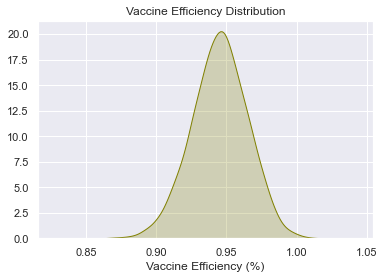

In [7]:

df = pd.Series(VEs).to_frame('Data')
sns.set(style='darkgrid')
sns.kdeplot(data=df,
            x='Data',
            bw_method = 0.2,
            color = 'olive',
            shade=True)
plt.xlabel("Vaccine Efficiency (%)")
plt.ylabel("");
plt.title("Vaccine Efficiency Distribution")

<a id='work_rct'></a>
# Working with RCT Data: Pennsylvania Reemployment Bonus Experiment (Analysis ongoing, explanation available)

### Q: Study the notebook on the Reemployment example; experiment with putting even more flexible controls (e.g. use interactions of all controls); report your findings.

## Conditional Average Treatment Effects
In a successful RCT we ensure that the treatment group (denoted as $D$=1) ought to be no different than the control group ($D$=0). This ensures that the average treatment effect is causal & non-biased. Put more formally:

$$
E[X|D=1] = E[X|D=0] 
$$

Where $X$ is a vector of controls.

With this condition achieved we are able to not only understand our average treatment effect but can reveal any heterogenous effects across different levels of $X$, we call this __Conditional Average Treatment Effects (CATE).__

While the canonical RCT model might look like this:
$$
Y_i = \alpha D_i + \beta_0 + \beta 'X_i + \epsilon_i 
$$

Where the coefficient $\alpha$ is the ATE from treatment.

Now we can *interact* our controls by treatment to study our CATE:
$$
Y_i = \alpha 'X_iD_i + \beta_0 + \beta 'X + \epsilon_i 
$$

Now we have many $\alpha$ coeifficents, where $\alpha_1$ corresponds to the ATE and $\alpha_2$ to $\alpha_k$ correspond to additive effects based on our $k$ number of controls. For instance, in our loyality card example imagine $X_k$ is an indicator for male, it could be the case that $\alpha_1 + \alpha_k > \alpha_1$, meaning loyality cards increase sales for everyone but even more so for men.



## Increasing Precision & Accuracy in RCTS: Controlling for Covariates

Even if heterogenous effects are of no interest to the study we can still add our available covariates/controls to increase precision of our estimates, precision being the improving standard errors to better detect statistical significance. 

Why is this? Let's imagine you run an RCT and randomize, we would expect the treatment effect (denoted as $\alpha$) to be unbiased between our treatment and control, this is because any characteristics between the two groups are the same, therefore:

$$
EY(1) - EY(0) = \alpha + \beta(\bar{X}_{treat} - \bar{X}_{control}) + (\bar{\epsilon}_{treat} - \bar{\epsilon}_{control})
$$

I.E. the treatment effect equals alpha if we randomize perfectly (difference in X's net to 0) and the expected unobserved differences between groups (denoted with the error terms) net to zero. However RCTs don't always run without a hitch, therefore controlling for characterizes ex-post can attenuate any bias by ensuring differences between groups net to zero. 

Even if we balance treatment & control perfectly including covariates that are predictive of our outcome can reduce noise and lower the standard error of our ATE variable, this is generally true if the covariates explain Y in anyway. If we can explain Y in a better sense, we then can reduce noise in Y, meaning the noise in ATE will lower in part.

below is an easy example to show this

In [12]:
import numpy as np 
import pandas as pd
import statsmodels.formula.api as sm
from prettytable import PrettyTable

#Make a dataframe of z = Treatment Group
# x_var = control
# make it so that individuals in treatment (z=1) are no different to individuals in control (z = 0).
df = pd.DataFrame(columns=['y', 'x1', 'z'])

for z_var in [0, 1]:
    for x_var in [0,1]:
        sample = pd.DataFrame({'y': np.random.randn(25),
                           'x1': x_var,
                           'z': z_var},
                          index = np.arange(0,25))
        
        df = df.append(sample)
        
        
        
result_no_x = sm.ols(formula="y ~ z", data=df).fit()
result_w_x = sm.ols(formula="y ~ z+x1", data=df).fit()

pt = PrettyTable()
pt.field_names = ["Model Type", "Beta Coef", "Standard Error"]
pt.add_row(["Treatment (z) w/o Control (x1) added", round(result_no_x.params[1],5), round(result_no_x.bse[1],5)])
pt.add_row(["Treatment (z) WITH Control (x1) added", round(result_w_x.params[1],5), round(result_w_x.bse[1],5)])
print(pt)

        



+---------------------------------------+-----------+----------------+
|               Model Type              | Beta Coef | Standard Error |
+---------------------------------------+-----------+----------------+
|  Treatment (z) w/o Control (x1) added |  -0.14237 |    0.18273     |
| Treatment (z) WITH Control (x1) added |  -0.14237 |    0.18361     |
+---------------------------------------+-----------+----------------+
